In [1]:
import random
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


Mejor solución encontrada:
Números: [3, 7, 2, 50, 5, 60, 15, 20]
Operaciones:['/', '-', '-', '+', '+', '+', '*']
Fitness: 1.5714285714286689
Mejor solución: 568.5714285714287


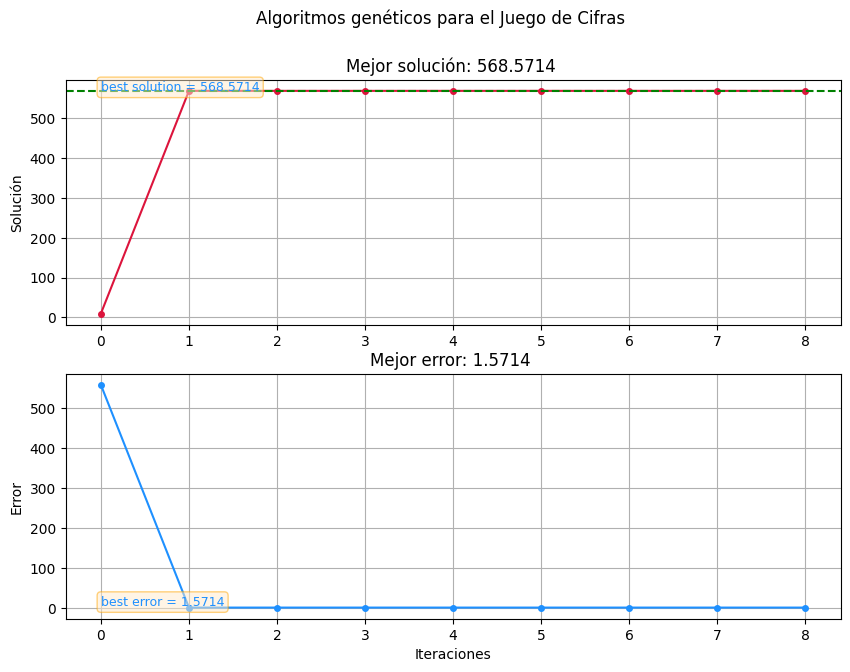

In [2]:
def plot_fitness(solutions, errors):
    # plt.figure(figsize=(10, 6))
    fig, axs = plt.subplots(2, figsize=(10, 7))
    fig.suptitle("Algoritmos genéticos para el Juego de Cifras")
    axs[0].plot(
        [i for i in range(len(solutions))],
        solutions,
        marker="o",
        linestyle="-",
        color="crimson",
        markersize=4,
    )
    axs[1].plot(
        [i for i in range(len(errors))],
        errors,
        marker="o",
        linestyle="-",
        color="dodgerblue",
        markersize=4,
    )
    bbox = dict(boxstyle="round", fc="blanchedalmond", ec="orange", alpha=0.5)
    axs[0].text(
        0,
        max(solutions),
        f"best solution = {round(solutions[len(solutions) - 1], 4)}",
        bbox=bbox,
        color="dodgerblue",
        fontsize=9,
    )
    axs[0].axhline(y=target, color="green", linestyle="--", label="Shortage threshold")
    axs[1].text(
        0,
        min(errors) + 5,
        f"best error = {round(errors[len(errors) - 1], 4)}",
        bbox=bbox,
        color="dodgerblue",
        fontsize=9,
    )
    axs[0].grid(True)
    axs[1].grid(True)
    plt.xlabel("Iteraciones")
    axs[0].set_title(f"Mejor solución: {round(solutions[len(solutions) - 1], 4)} ")
    axs[1].set_title(f"Mejor error: {round(errors[len(errors) - 1], 4)} ")
    axs[0].set_ylabel("Solución")
    axs[1].set_ylabel("Error")
    plt.show()


# Definimos la lista de números disponibles y las operaciones
numbers = [2, 3, 5, 7, 10, 12, 15, 20, 23, 25, 30, 35, 40, 50, 60]
operations = ["+", "-", "*", "/"]
target = 567
# Listas para graficar
all_solutions = []
all_errors = []


# Función para calcular el error de un individuo
def evaluate_solution(numbers, operations):
    result = numbers[0]
    for i in range(len(operations)):
        try:
            if operations[i] == "+":
                result += numbers[i + 1]
            elif operations[i] == "-":
                result -= numbers[i + 1]
            elif operations[i] == "*":
                result *= numbers[i + 1]
            elif operations[i] == "/" and numbers[i + 1] != 0:
                result /= numbers[i + 1]
        except ZeroDivisionError:
            return float("inf")
    return result, abs(target - result)


# Generar un individuo aleatorio
# #? Enunciado: El espacio de soluciones se genera a partir de todas las permutaciones posibles de
# #? los números seleccionados (al menos 8 números) y todas las combinaciones de
# #? operaciones entre ellos, incluido el uso de paréntesis para definir el orden de las
# #? operaciones
def generate_individual():

    chosen_numbers = random.sample(numbers, 8)  # Escoge 8 números aleatorios
    chosen_operations = random.choices(
        operations, k=7
    )  # Escoge 7 operaciones aleatorias
    return (chosen_numbers, chosen_operations)


# TODO: Crear un torneo
# Selección: elige los num_parents individuos con el menor error
def selection(population, fitness, num_parents):
    parents = sorted(zip(population, fitness), key=lambda x: x[1])
    return [p[0] for p in parents[:num_parents]]


# Selección: elige los individuos por el método de ruleta
def roulette_wheel(population, fitness, num_parents):
    # Sumatoria del fitness de cada individuo
    population_fitness = sum(fitness)

    # Probabilidad de cada cromosoma
    chromosome_probabilities = [
        chromosome / population_fitness for chromosome in fitness
    ]

    # Array con las probabilidades de cada individuo
    positions = np.random.choice(len(population), num_parents, p=chromosome_probabilities).tolist()

    roulette_results = [population[i] for i in positions]
    return roulette_results


# Cruce: combina dos padres para crear un hijo
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1[0]) - 2)
    child_numbers = parent1[0][:crossover_point] + parent2[0][crossover_point:]
    child_operations = parent1[1][:crossover_point] + parent2[1][crossover_point:]
    return (child_numbers, child_operations)


# Mutación: cambia un número o una operación aleatoriamente
def mutate(individual):
    if random.random() < 0.5:  # Mutación en números
        idx = random.randint(0, len(individual[0]) - 1)
        individual[0][idx] = random.choice(numbers)
    else:  # Mutación en operaciones
        idx = random.randint(0, len(individual[1]) - 1)
        individual[1][idx] = random.choice(operations)
    return individual


    # Configuración del Algoritmo Genético
population_size = 4
generations = 9
num_parents = 4

# Inicializa la población
population = [generate_individual() for _ in range(population_size)]
fitness = [evaluate_solution(ind[0], ind[1])[1] for ind in population]

# Mejor individuo de la población inicial
best_individual = population[np.argmin(fitness)]
best_fitness = min(fitness)

# Iteración del algoritmo
for generation in range(generations):
    # Actualiza el mejor fitness de la generación actual
    fitness = [evaluate_solution(ind[0], ind[1])[1] for ind in population]
    current_best_fitness = min(fitness)
    if current_best_fitness < best_fitness:
        best_fitness = current_best_fitness
        best_individual = population[np.argmin(fitness)]

    all_solutions.append(evaluate_solution(best_individual[0], best_individual[1])[0])
    all_errors.append(best_fitness)

    if best_fitness == 0:
        print("¡Se encontró una solución exacta!")
        break

    # Selección de los padres
    parents = selection(population, fitness, num_parents)
    # parents = roulette_wheel(population, fitness, num_parents)

    # Generación de nueva población a partir de los padres
    new_population = []
    while len(new_population) < population_size:

        parent1, parent2 = random.sample(parents, 2)

        # Intento de crear un hijo válido
        child1 = crossover(parent1, parent2)
        child2 = crossover(parent2, parent1)

        # Mutación y evaluación del primer hijo
        if random.uniform(0, 1) < 0.4:
            child1 = mutate(child1)
        child1_fitness = evaluate_solution(child1[0], child1[1])[1]
        child1_value = evaluate_solution(child1[0], child1[1])[0]

        if child1_fitness <= best_fitness:
            new_population.append(child1)
            if child1_fitness < best_fitness:
                best_fitness = child1_fitness
                best_individual = child1

        # Mutación y evaluación del segundo hijo
        if len(new_population) < population_size:  # Verifica el tamaño de la población
            if random.uniform(0, 1) < 0.4:
                child2 = mutate(child2)
            child2_fitness = evaluate_solution(child2[0], child2[1])[1]
            child2_value = evaluate_solution(child1[0], child1[1])[0]
            if child2_fitness <= best_fitness:
                new_population.append(child2)
                if child2_fitness < best_fitness:
                    best_fitness = child2_fitness
                    best_individual = child2

    # all_errors.append(best_fitness)
    # all_solutions.append(evaluate_solution(best_individual[0], best_individual[1])[0])
    # Actualiza la población para la siguiente generación
    population = new_population

# Resultado final
print("\nMejor solución encontrada:")
print("Números: {}".format(best_individual[0]))
print("Operaciones:{}".format(best_individual[1]))
print(
    "Fitness: {}".format(evaluate_solution(best_individual[0], best_individual[1])[1])
)
print(
    f"Mejor solución: {evaluate_solution(best_individual[0],best_individual[1])[0]}"
)
plot_fitness(all_solutions, all_errors)
# print(len(all_solutions))
